In [18]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import time
y1950 = pd.read_csv('1950.xls')
y1960 = pd.read_csv('1960.xls')
y1970 = pd.read_csv('1970.xls')
y1980 = pd.read_csv('1980.xls')
y1990 = pd.read_csv('1990.xls')
y2000 = pd.read_csv('2000.xls')
y2010 = pd.read_csv('2010.xls')

In [19]:
y1950['decade'] = 1950
y1960['decade'] = 1960
y1970['decade'] = 1970
y1980['decade'] = 1980
y1990['decade'] = 1990
y2000['decade'] = 2000
y2010['decade'] = 2010

In [20]:
all_data = pd.concat([y1950,y1960,y1970,y1980,y1990,y2000,y2010])
y1950.year.dtype

dtype('int64')

In [21]:
y1950.head() # some re-releases of songs show up in earlier decades, but the 'year' is a later date
#ex: Paul Anka's "Put Your Head On My Shoulder" - in 1950s, release year is 2000.

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,decade
0,1,Put Your Head On My Shoulder,Paul Anka,adult standards,2000,116,34,55,-9,10,47,155,75,3,72,1950
1,2,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62,1950
2,3,Everybody Loves Somebody,Dean Martin,adult standards,2013,81,49,26,-9,34,40,162,81,4,61,1950
3,4,Take Good Care Of My Baby - 1990 Remastered,Bobby Vee,adult standards,2011,82,43,49,-12,12,66,151,70,6,60,1950
4,5,A Teenager In Love,Dion & The Belmonts,adult standards,1959,79,38,56,-9,13,62,158,67,3,60,1950


In [22]:
y2010.corr().columns

Index(['Number', 'year', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur',
       'acous', 'spch', 'pop', 'decade'],
      dtype='object')

In [23]:
all_data.corr() #popularity and decade are mildly correlated, also decade and acous dnce and dB
#popularity correlated-ish with dB? acous, decade

,Number,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,decade
Number,1.000000,0.122851,0.030950,0.174730,0.046153,0.042841,0.046433,0.089254,0.058410,-0.074355,-0.059867,-0.519745,0.071529
year,0.122851,1.000000,-0.020790,0.195329,0.273865,0.422602,-0.001603,-0.087055,-0.099655,-0.241289,0.193292,0.160467,0.580309
bpm,0.030950,-0.020790,1.000000,0.179329,-0.057710,0.044748,0.009960,0.084723,0.038277,-0.175530,0.059116,0.066558,0.060434
nrgy,0.174730,0.195329,0.179329,1.000000,0.331962,0.702543,0.132563,0.405190,0.131228,-0.665900,0.178491,0.271798,0.428114
dnce,0.046153,0.273865,-0.057710,0.331962,1.000000,0.295534,-0.069818,0.454714,0.053011,-0.382297,0.207741,0.249302,0.398135
dB,0.042841,0.422602,0.044748,0.702543,0.295534,1.000000,0.083423,0.136813,0.026851,-0.504551,0.200195,0.365172,0.561361
live,0.046433,-0.001603,0.009960,0.132563,-0.069818,0.083423,1.000000,0.060542,-0.067533,-0.056394,0.091595,-0.036505,-0.025042
val,0.089254,-0.087055,0.084723,0.405190,0.454714,0.136813,0.060542,1.000000,-0.118664,-0.196375,0.053817,-0.102418,-0.128770
dur,0.058410,-0.099655,0.038277,0.131228,0.053011,0.026851,-0.067533,-0.118664,1.000000,-0.227505,0.045265,0.280501,0.262528
acous,-0.074355,-0.241289,-0.175530,-0.665900,-0.382297,-0.504551,-0.056394,-0.196375,-0.227505,1.000000,-0.172820,-0.455239,-0.581004


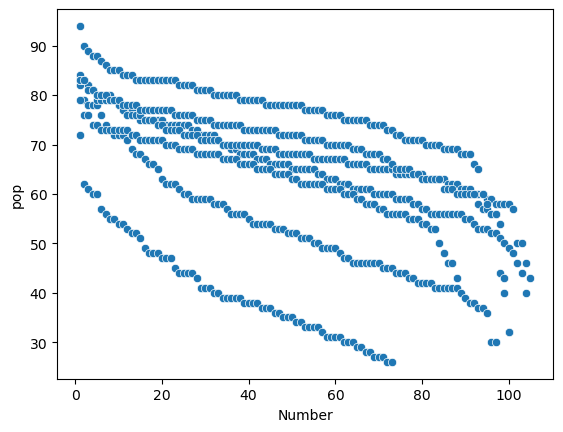

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 157 (\x9d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


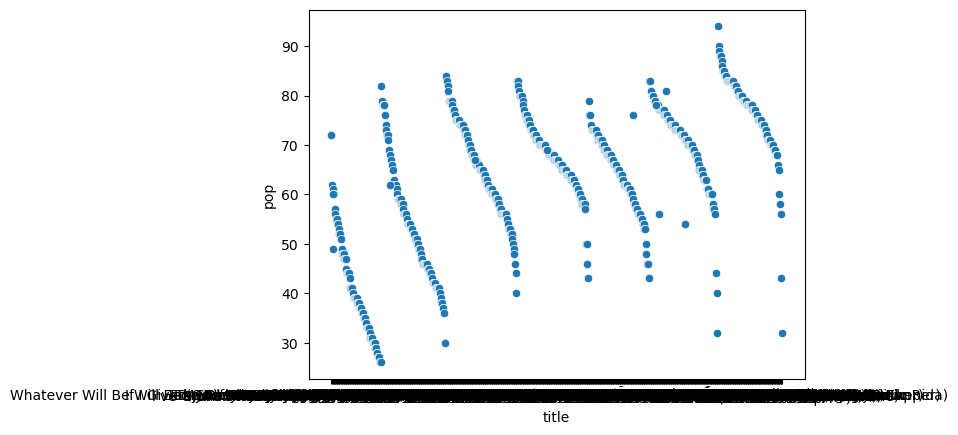

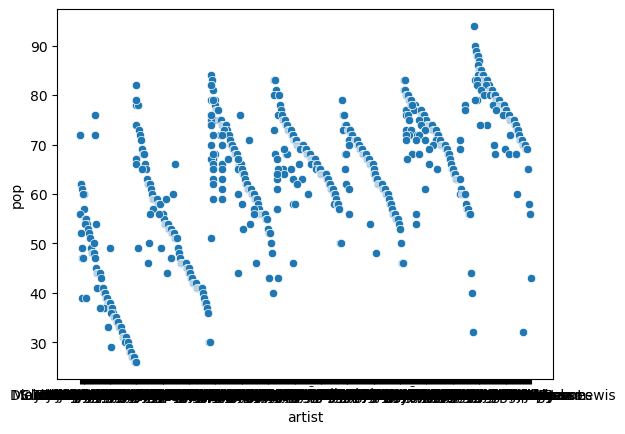

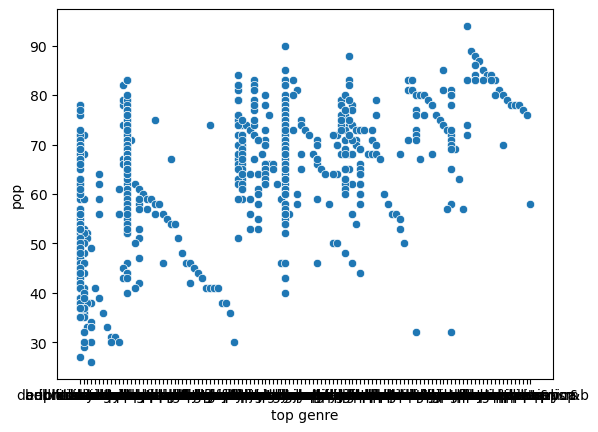

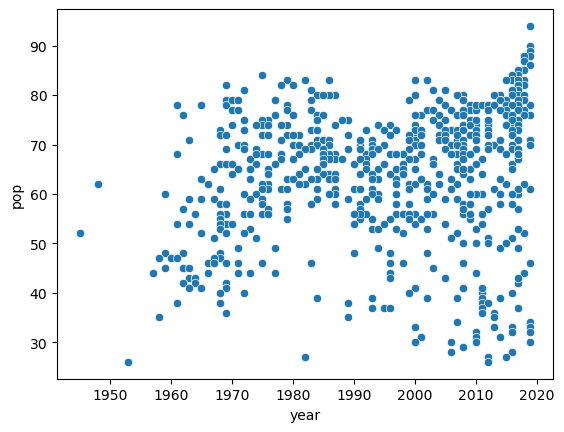

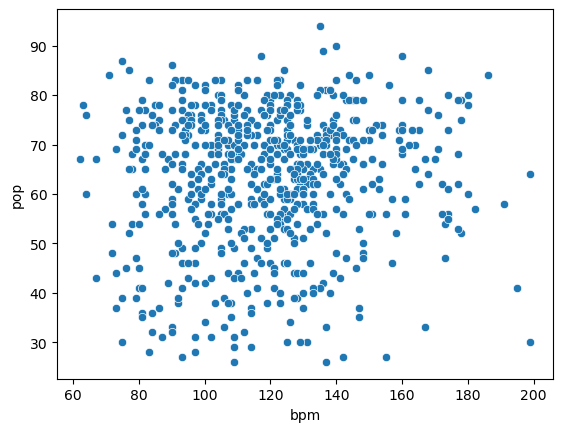

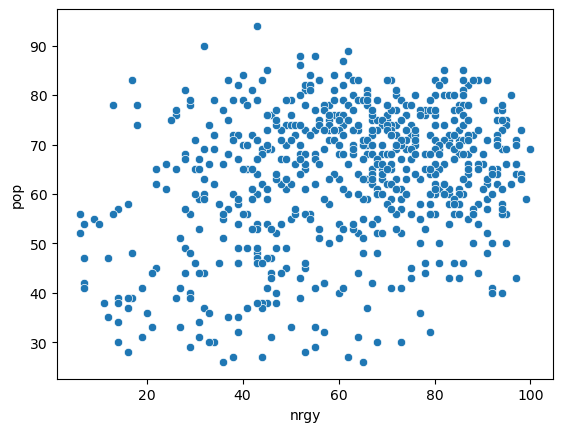

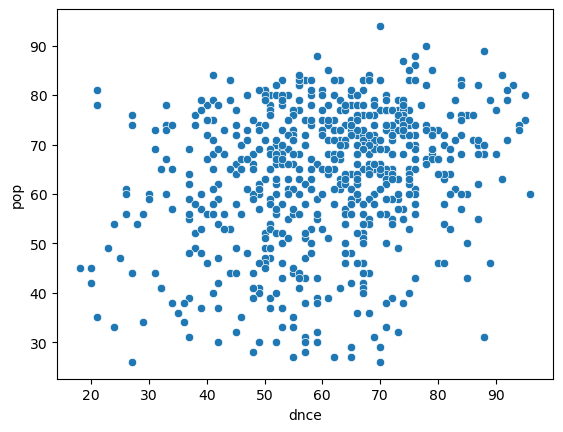

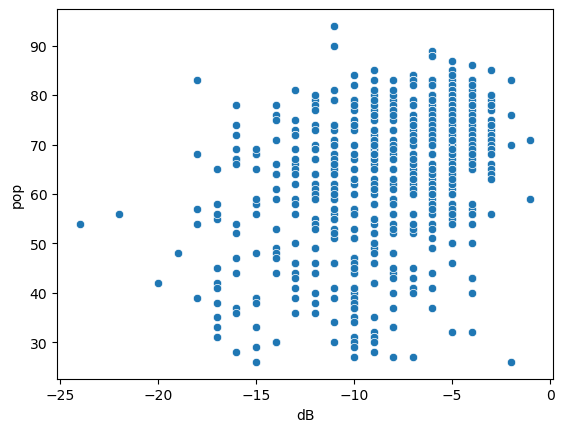

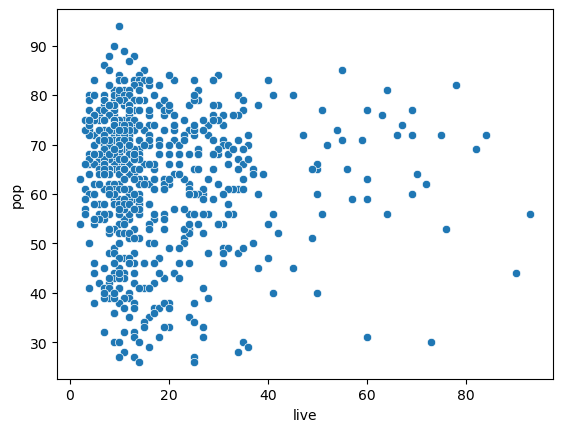

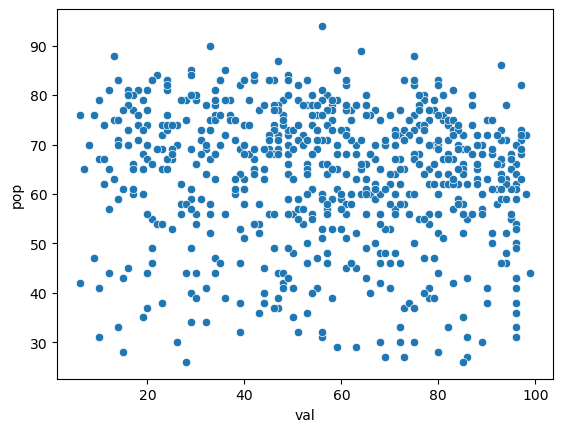

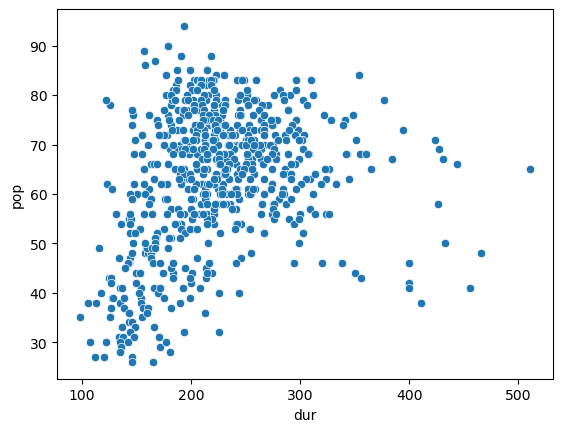

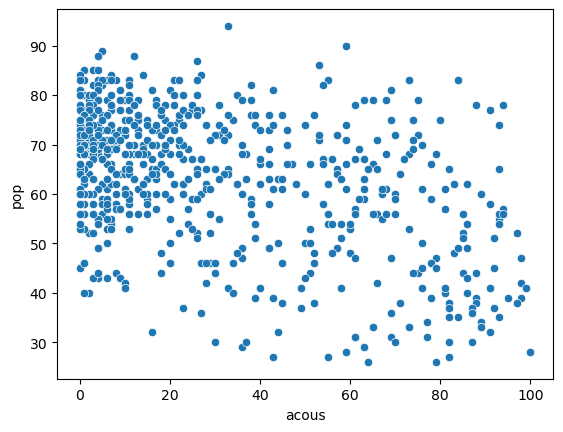

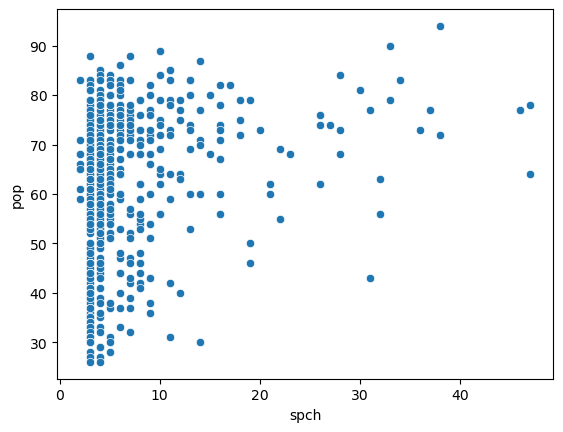

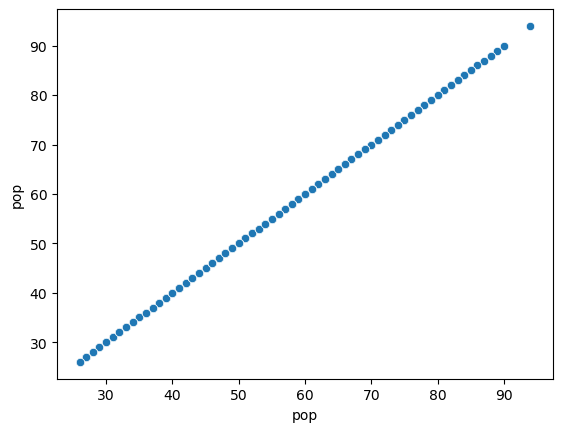

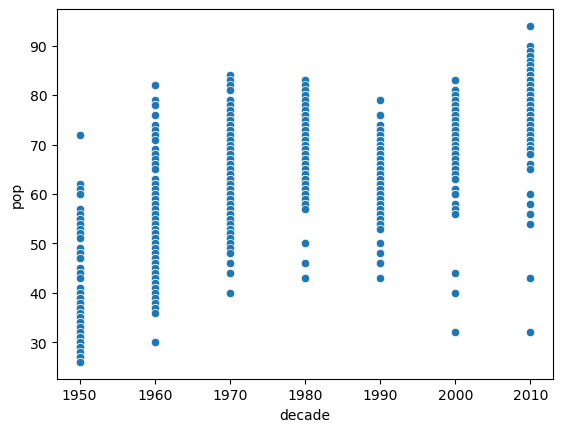

In [24]:
for i in all_data.columns:
    sns.scatterplot(x=i, y="pop", data=all_data)
    plt.show()

In [25]:
#duration, decade
model = smf.ols(formula='pop ~ acous+dB+dur+I(dur**2)', data=all_data).fit()
model.summary()
#+I(decade**2)+I(decade**3)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pop   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     83.39
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           2.48e-57
Time:                        13:19:34   Log-Likelihood:                -2556.9
No. Observations:                 667   AIC:                             5124.
Df Residuals:                     662   BIC:                             5146.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      24.7454      5.280      4.686      0.000      14.377      35.114
acous          -0.0979      0.019     -5.161      0.000      -0.135      -0.061
dB              0.7044      0.139      5.078      0.000       0.432       0.977
dur             0.3554      0.039      9.002      0.000       0.278       0.433
I(dur ** 2)    -0.0006   7.53e-05     -7.951      0.000      -0.001      -0.000
==============================================================================
Omnibus:                        0.884   Durbin-Watson:                   0.474
Prob(Omnibus):                  0.643   Jarque-Bera (JB):                0.734
Skew:                          -0.065   Prob(JB):                        0.693
Kurtosis:                       3.097   Cond. No.                     7.53e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = all_data[["dur",	"acous",	"decade"]]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

  feature        VIF
0     dur  16.057783
1   acous   2.145139
2  decade  18.809922


In [27]:
from sklearn.model_selection import train_test_split
X = all_data.drop('pop', axis=1)
y = all_data['pop']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [28]:
model = smf.ols(formula='pop ~ acous+dB+dur+I(dur**2)', data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pop   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     66.94
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           8.33e-46
Time:                        13:19:34   Log-Likelihood:                -2027.0
No. Observations:                 533   AIC:                             4064.
Df Residuals:                     528   BIC:                             4085.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      29.0638      5.789      5.021      0.000      17.692      40.436
acous          -0.1087      0.021     -5.183      0.000      -0.150      -0.068
dB              0.7610      0.154      4.934      0.000       0.458       1.064
dur             0.3270      0.043      7.542      0.000       0.242       0.412
I(dur ** 2)    -0.0005   8.26e-05     -6.630      0.000      -0.001      -0.000
==============================================================================
Omnibus:                        2.971   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.226   Jarque-Bera (JB):                2.800
Skew:                          -0.173   Prob(JB):                        0.247
Kurtosis:                       3.083   Cond. No.                     7.64e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
#Computing RMSE on test data
from sklearn.metrics import mean_squared_error
from math import sqrt

train_rmse = sqrt(mean_squared_error(train['pop'], model.predict(train)))
test_rmse = sqrt(mean_squared_error(test['pop'], model.predict(test)))

print('train rmse: ', train_rmse)
print('test rmse: ', test_rmse)

train rmse:  10.848930834877503
test rmse:  12.47053544028718


In [34]:
#Creating a set of predictors from which we need to find the best subset of predictors
X = all_data[['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur',
       'acous', 'spch']]
#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = sm.ols('pop~' + '+'.join(predictor_subset),data = all_data).fit()
    Rsquared = model.rsquared
    return {"model":model, "Rsquared":Rsquared}

In [35]:
#Function to select the best model amongst all models with 'k' predictors
def getBest_model(k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset((list(combo))))

    # Wrap everything up in a dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    return best_model

In [36]:
#Function to select the best model amongst the best models for 'k' predictors, where k = 1,2,3,..
models_best = pd.DataFrame(columns=["Rsquared", "model"])

tic = time.time()
for i in range(1,1+X.shape[1]):
    models_best.loc[i] = getBest_model(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 9 models on 1 predictors in 0.12490415573120117 seconds.
Processed 36 models on 2 predictors in 0.15542292594909668 seconds.
Processed 84 models on 3 predictors in 0.42458343505859375 seconds.
Processed 126 models on 4 predictors in 0.7427799701690674 seconds.
Processed 126 models on 5 predictors in 0.829242467880249 seconds.
Processed 84 models on 6 predictors in 0.6599764823913574 seconds.
Processed 36 models on 7 predictors in 0.39031982421875 seconds.
Processed 9 models on 8 predictors in 0.0816342830657959 seconds.
Processed 1 models on 9 predictors in 0.00969386100769043 seconds.
Total elapsed time: 3.446502208709717 seconds.


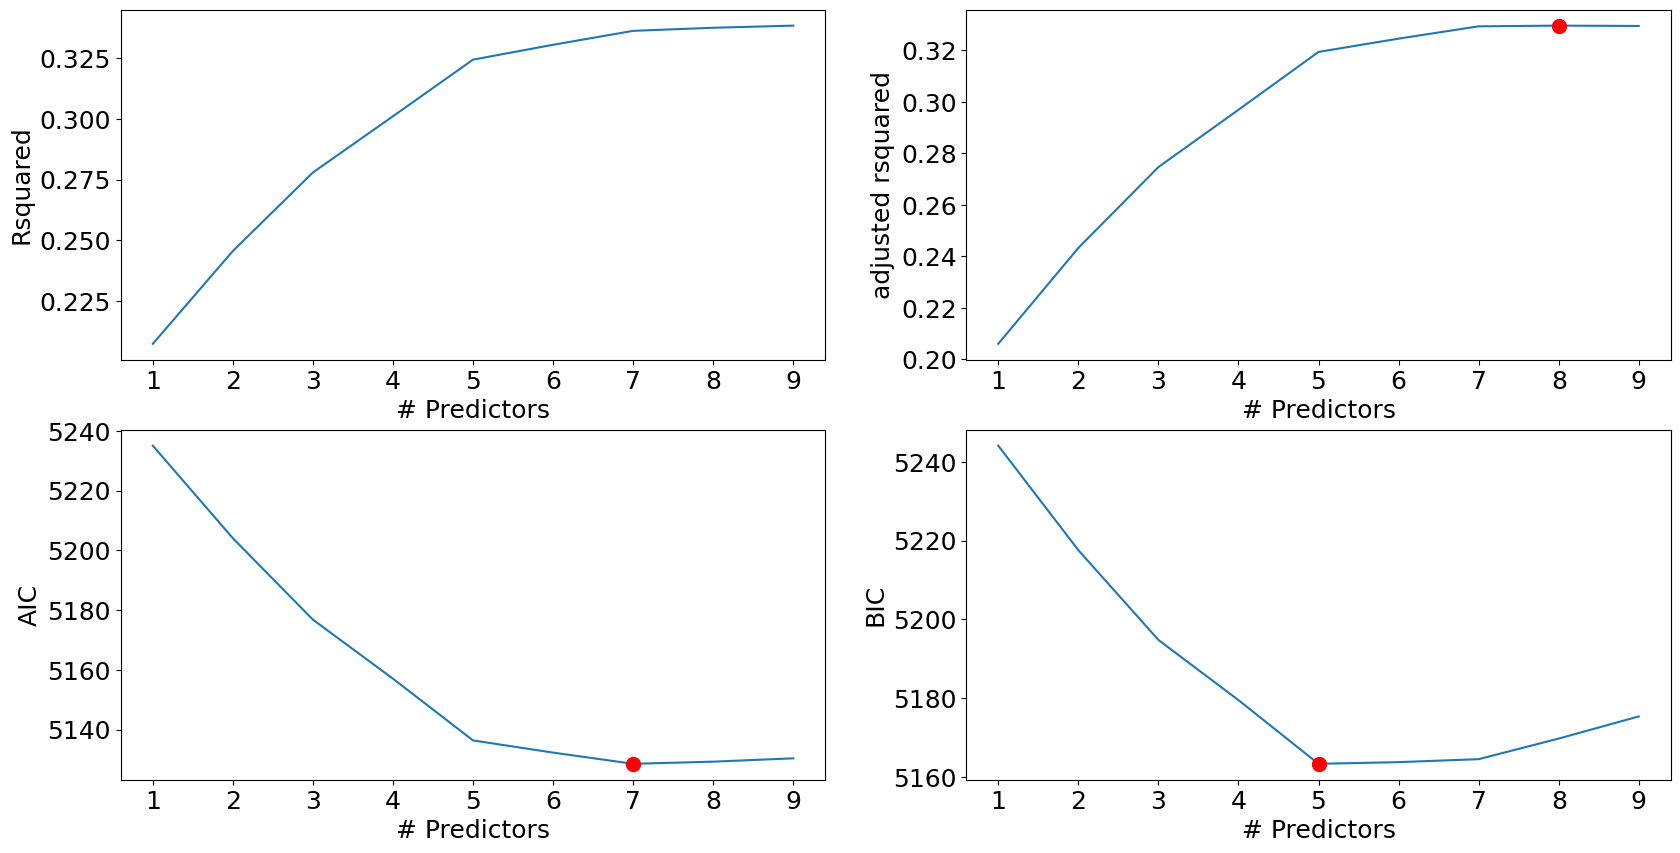

In [37]:
def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(2, 2, 1)

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    plt.plot(models_best["Rsquared"])
    plt.xlabel('# Predictors')
    plt.ylabel('Rsquared')

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector

    rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(rsquared_adj)
    plt.plot(1+rsquared_adj.argmax(), rsquared_adj.max(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('adjusted rsquared')

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 3)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 4)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')
best_sub_plots()

In [38]:
best_subset_model1 = models_best.loc[5,'model']
models_best.loc[5,'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pop   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     63.49
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           4.29e-54
Time:                        13:21:00   Log-Likelihood:                -2562.2
No. Observations:                 667   AIC:                             5136.
Df Residuals:                     661   BIC:                             5163.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.9200      3.103     20.278      0.000      56.827      69.013
dnce           0.1675      0.035      4.780      0.000       0.099       0.236
dB             0.7086      0.141      5.032      0.000       0.432       0.985
val           -0.1412      0.021     -6.885      0.000      -0.181      -0.101
dur            0.0385      0.008      4.994      0.000       0.023       0.054
acous         -0.1431      0.019     -7.538      0.000      -0.180      -0.106
==============================================================================
Omnibus:                        8.673   Durbin-Watson:                   0.497
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                8.710
Skew:                          -0.279   Prob(JB):                       0.0128
Kurtosis:                       3.047   Cond. No.                     1.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
best_subset_model2 = models_best.loc[7,'model']
models_best.loc[7,'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pop   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     47.71
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           8.69e-55
Time:                        13:21:11   Log-Likelihood:                -2556.3
No. Observations:                 667   AIC:                             5129.
Df Residuals:                     659   BIC:                             5165.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     69.7932      4.313     16.182      0.000      61.324      78.262
nrgy          -0.0938      0.037     -2.537      0.011      -0.166      -0.021
dnce           0.1403      0.036      3.932      0.000       0.070       0.210
dB             0.9475      0.178      5.322      0.000       0.598       1.297
val           -0.1121      0.023     -4.879      0.000      -0.157      -0.067
dur            0.0408      0.008      5.286      0.000       0.026       0.056
acous         -0.1678      0.022     -7.792      0.000      -0.210      -0.126
spch           0.1742      0.073      2.389      0.017       0.031       0.317
==============================================================================
Omnibus:                       11.910   Durbin-Watson:                   0.526
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.269
Skew:                          -0.332   Prob(JB):                      0.00217
Kurtosis:                       2.978   Cond. No.                     2.52e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
best_subset_model3 = models_best.loc[8,'model']
models_best.loc[8,'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pop   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     41.92
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           3.36e-54
Time:                        13:21:32   Log-Likelihood:                -2555.6
No. Observations:                 667   AIC:                             5129.
Df Residuals:                     658   BIC:                             5170.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     67.4240      4.800     14.046      0.000      57.999      76.849
bpm            0.0204      0.018      1.123      0.262      -0.015       0.056
nrgy          -0.0980      0.037     -2.639      0.009      -0.171      -0.025
dnce           0.1468      0.036      4.062      0.000       0.076       0.218
dB             0.9663      0.179      5.405      0.000       0.615       1.317
val           -0.1138      0.023     -4.942      0.000      -0.159      -0.069
dur            0.0408      0.008      5.292      0.000       0.026       0.056
acous         -0.1648      0.022     -7.595      0.000      -0.207      -0.122
spch           0.1693      0.073      2.317      0.021       0.026       0.313
==============================================================================
Omnibus:                       11.426   Durbin-Watson:                   0.527
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.759
Skew:                          -0.325   Prob(JB):                      0.00280
Kurtosis:                       2.970   Cond. No.                     3.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
### W INTERACTION
X = train[['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch']]
X_backup = train[['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch']]

#Including 2-factor interactions of predictors in train and 'X'. Note that we need train to develop the model, and X to 
#find 'k' variable subsets from amongst all the predictors under consideration
for combo in itertools.combinations(X_backup.columns, 2):    
    train['_'.join(combo)] = train[combo[0]]*train[combo[1]]
    test['_'.join(combo)] = test[combo[0]]*test[combo[1]]
    X.loc[:,'_'.join(combo)] = train.loc[:,'_'.join(combo)] 

C:\Users\tyrot\AppData\Local\Temp\ipykernel_27396\3505142637.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'_'.join(combo)] = train.loc[:,'_'.join(combo)]
C:\Users\tyrot\AppData\Local\Temp\ipykernel_27396\3505142637.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'_'.join(combo)] = train.loc[:,'_'.join(combo)]
C:\Users\tyrot\AppData\Local\Temp\ipykernel_27396\3505142637.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [47]:
models_best = pd.DataFrame(columns=["Rsquared", "model"])

tic = time.time()
for i in range(1,1+X.shape[1]):
    models_best.loc[i] = getBest_model(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

PatsyError: Error evaluating factor: NameError: name 'bpm_nrgy' is not defined
    pop~bpm_nrgy
        ^^^^^^^^